In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
#import dataframe
df_apart = pd.read_csv('dados_apartamentos.csv',  encoding = "ISO-8859-1", sep=';', header=0)
df_houses = pd.read_csv('houses_dados.csv',encoding = "ISO-8859-1", sep=';', header=0) 

In [3]:
#drop empty columns
df_apart = df_apart.drop(['Unnamed: 13','Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23'], axis = 1)

In [4]:
#drop duplicated column and Distance (distance from ..?)
df_houses=df_houses.drop(['Condition.1', 'Distance'], axis =1)

In [5]:
#rename column
df_houses.rename(columns={'Entry Date': 'entry_date', 'Property type': 'property_type', 'Areas (sqm)':'areas_sqm','Û/sqm': 'euros/sqm', 'Built year':'built_year'}, inplace=True)
df_apart.rename(columns={'Entry Date': 'entry_date', 'Property type': 'property_type', 'Areas (sqm)':'areas_sqm','Built year':'built_year'}, inplace=True)

In [9]:
# clean sqm from Areas (sqm) 
df_apart['areas_sqm'] = df_apart['areas_sqm'].str.extract('(\d+)', expand=False)

In [10]:
df_apart.head()

,entry_date,property_type,Tipology,Condition,Location,Price,areas_sqm,euros/sqm,built_year,Latitude,Longitude,Characteristics,Mister URL,Areas (sqm)
0,20/07/20,Apartments,T2,Used,"Aveiro,Aveiro,Aradas",145000,96,1518,NaN,NaN,NaN,NaN,http://primeavm.prime-yield.com/property/5788813,96
1,20/07/20,Apartments,T2,Used,"Aveiro,Aveiro,Aradas",155000,119,1303,NaN,NaN,NaN,NaN,http://primeavm.prime-yield.com/property/5788814,119
2,20/07/20,Apartments,T2,Used,"Aveiro,Aveiro,Aradas",118000,72,1639,NaN,NaN,NaN,NaN,http://primeavm.prime-yield.com/property/5788815,72
3,20/07/20,Apartments,T2,Used,"Aveiro,Aveiro,Aradas",185000,90,2056,NaN,NaN,NaN,NaN,http://primeavm.prime-yield.com/property/5788816,90
4,20/07/20,Apartments,T2,New,"Aveiro,Aveiro,Aradas",295000,126,2351,NaN,NaN,NaN,NaN,http://primeavm.prime-yield.com/property/5788817,126


In [11]:
df_houses.head()

,entry_date,property_type,Tipology,Condition,Location,Price,areas_sqm,euros/sqm,built_year,Latitude,Longitude,Characteristics
0,21/02/21,Houses,T4,Used,"Aveiro,êlhavo,Gafanha da Encarnao",570000,175,"3257,14",NaN,NaN,NaN,NaN
1,21/02/21,Houses,T3,Used,"Aveiro,êlhavo,Gafanha da Encarnao",320000,258,"1240,31",NaN,NaN,NaN,NaN
2,21/02/21,Houses,T3,Used,"Aveiro,êlhavo,Gafanha da Encarnao",315000,140,"2250,00",NaN,NaN,NaN,NaN
3,21/02/21,Houses,T4,Used,"Aveiro,êlhavo,Gafanha da Encarnao",237000,194,"1221,65",NaN,NaN,NaN,NaN
4,21/02/21,Houses,T4,Used,"Aveiro,êlhavo,Gafanha da Encarnao",580000,193,"3005,18",NaN,NaN,NaN,NaN


In [12]:
#shape of datasets
print(df_apart.shape)
print(df_houses.shape)

(3654, 14)
(526, 12)


In [13]:
#find nulls
col_null_apart = df_apart.isnull().sum()
col_null_houses = df_houses.isnull().sum()
print(col_null_apart)
print(col_null_houses)

entry_date            0
property_type         0
Tipology              0
Condition             0
Location              0
Price                 0
areas_sqm             0
euros/sqm             0
built_year          968
Latitude           1588
Longitude          1588
Characteristics    2315
Mister URL            0
Areas (sqm)           0
dtype: int64
entry_date           0
property_type        0
Tipology             0
Condition            0
Location             0
Price                0
areas_sqm            0
euros/sqm            0
built_year         143
Latitude           142
Longitude          142
Characteristics    523
dtype: int64


In [35]:
apart_tip = df_apart['Tipology'].value_counts()
house_tip = df_houses['Tipology'].value_counts()
print(apart_tip)
print(house_tip)

T2    1457
T3    1108
T1     569
T4     332
T0     169
T5      19
Name: Tipology, dtype: int64
T4    223
T3    181
T2     59
T5     41
T6     21
T1      1
Name: Tipology, dtype: int64


In [15]:
print(df_apart.dtypes)

entry_date          object
property_type       object
Tipology            object
Condition           object
Location            object
Price                int64
areas_sqm           object
euros/sqm            int64
built_year         float64
Latitude            object
Longitude           object
Characteristics     object
Mister URL          object
Areas (sqm)         object
dtype: object
entry_date         object
property_type      object
Tipology           object
Condition          object
Location           object
Price               int64
areas_sqm          object
euros/sqm          object
built_year         object
Latitude           object
Longitude          object
Characteristics    object
dtype: object


In [16]:
print(df_houses.dtypes)

entry_date         object
property_type      object
Tipology           object
Condition          object
Location           object
Price               int64
areas_sqm          object
euros/sqm          object
built_year         object
Latitude           object
Longitude          object
Characteristics    object
dtype: object


<AxesSubplot:>

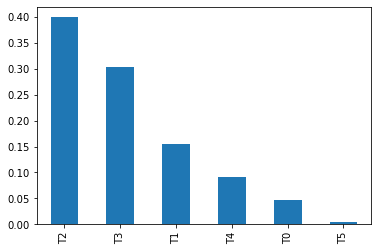

In [41]:
(apart_tip/df_apart.shape[0]).plot(kind = 'bar')
#percentagem de apartamentos por tipologia

<AxesSubplot:>

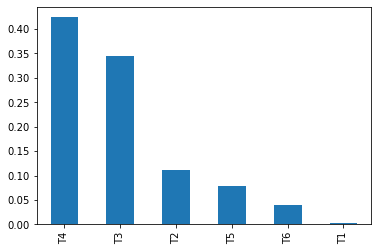

In [42]:
(house_tip/df_houses.shape[0]).plot(kind = 'bar')
#percentagem de casas por tipologia

In [21]:
#prices by tipology - mean
df_apart.groupby(['Tipology']).mean()['Price'].sort_values()

Tipology
T0    132109.467456
T1    153714.938489
T2    209469.621139
T3    270849.129061
T4    336612.123494
T5    347421.052632
Name: Price, dtype: float64

In [22]:
df_houses.groupby(['Tipology']).mean()['Price'].sort_values()

Tipology
T1    120000.000000
T2    144503.661017
T3    278587.237569
T6    295095.238095
T5    358768.292683
T4    363281.838565
Name: Price, dtype: float64

In [25]:
#prices by Condition
df_apart.groupby(['Condition']).mean()['Price'].sort_values()

Condition
Renovated             160614.238095
To Recuperate         183681.818182
Used                  213328.568642
Under Project         225941.904762
New                   263283.062130
Under Construction    277358.090452
Name: Price, dtype: float64

In [26]:
df_houses.groupby(['Condition']).mean()['Price'].sort_values()

Condition
Ruin                  104100.000000
To Recuperate         115250.000000
Renovated             275000.000000
Used                  297259.192661
Under Construction    324219.178082
New                   348704.687500
Under Project         435000.000000
Name: Price, dtype: float64